In [1]:
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

X_train = mnist.train.images
y_train = mnist.train.labels
X_test = mnist.test.images
y_test = mnist.test.labels

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)    
print('Training labels shape: ', y_train.shape)   
print('Test data shape: ', X_test.shape)        
print('Test labels shape: ', y_test.shape)     

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Training data shape:  (55000, 784)
Training labels shape:  (55000, 10)
Test data shape:  (10000, 784)
Test labels shape:  (10000, 10)


In [2]:
print(y_test[1])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


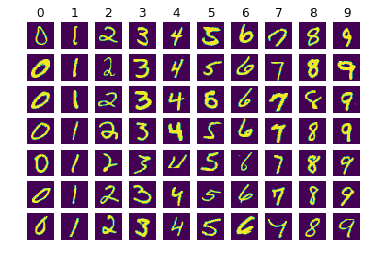

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = list(range(10))
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y == np.argmax(y_train, axis=1))#1代表行
    idxs = np.random.choice(idxs, samples_per_class, replace=False)#随机抽7张该类图片
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1#将同一类图片显示在同一列
        plt.subplot(samples_per_class, num_classes, plt_idx)
        image = (X_train[idx].reshape((28, 28))*255).astype('uint8')
        plt.imshow(image)
#         print(image)
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [4]:
import tensorflow as tf
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
# W_1 = tf.Variable(tf.zeros([784, 30]))
W_1 = tf.get_variable('W_1', [784, 30], initializer=tf.random_normal_initializer())
# b_1 = tf.Variable(tf.zeros([30]))
b_1 = tf.get_variable('b_1', [30], initializer=tf.random_normal_initializer())
z_1 = tf.matmul(x, W_1) + b_1
a_1 = tf.sigmoid(z_1)

# W_2 = tf.Variable(tf.zeros([30, 10]))
W_2 = tf.get_variable('W_2', [30, 10], initializer=tf.random_normal_initializer())
# b_2 = tf.Variable(tf.zeros([10]))
b_2 = tf.get_variable('b_2', [10], initializer=tf.random_normal_initializer())
z_2 = tf.matmul(a_1, W_2) + b_2
a_2 = tf.nn.softmax(z_2)

In [5]:
# Define loss and optimizer
y = tf.placeholder(tf.float32, [None, 10])
# loss = tf.losses.mean_squared_error(y, a_2)
# loss = tf.reduce_mean(tf.norm(y - a_2, axis=1)**2) / 2
#换成交叉熵,效果比MSE好很多。
loss = -tf.reduce_sum(y*tf.log(a_2))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)#学习率从0.1降为0.01

Epoch 0 training loss: 23.32750477720636, test acc: 0.8659
Epoch 1 training loss: 12.592208439157211, test acc: 0.8949
Epoch 2 training loss: 10.447956165479619, test acc: 0.9059
Epoch 3 training loss: 9.289938138966475, test acc: 0.9139
Epoch 4 training loss: 8.498209057873453, test acc: 0.9215
Epoch 5 training loss: 7.902393542075753, test acc: 0.9237
Epoch 6 training loss: 7.4269807085541135, test acc: 0.9273
Epoch 7 training loss: 7.022240276408809, test acc: 0.9291
Epoch 8 training loss: 6.72278274603862, test acc: 0.9305
Epoch 9 training loss: 6.440629087104144, test acc: 0.9308
Epoch 10 training loss: 6.204335058219683, test acc: 0.9332
Epoch 11 training loss: 5.975081811456926, test acc: 0.9349
Epoch 12 training loss: 5.783404592095562, test acc: 0.9347
Epoch 13 training loss: 5.606630930106277, test acc: 0.9385
Epoch 14 training loss: 5.465474491339723, test acc: 0.9372
Epoch 15 training loss: 5.317218523955984, test acc: 0.9386
Epoch 16 training loss: 5.148945595293165, test 

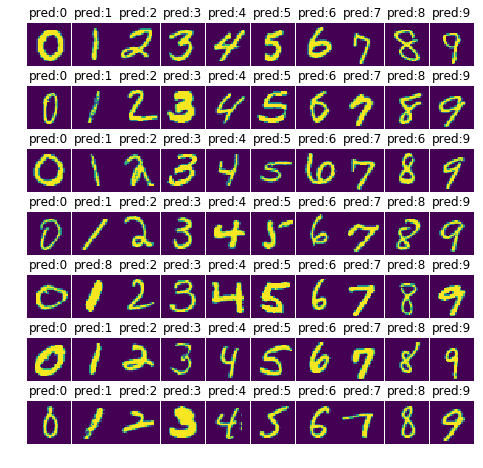

In [15]:
correct_prediction = tf.equal(tf.argmax(a_2, 1), tf.argmax(y, 1)) #(num_training,1),预测正确为1，反之为0
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # tf.int32 注意tf.int32会导致，acc算出来一直为0，reduce_mean可能要求输入为浮点数
init_op = tf.global_variables_initializer()

import matplotlib.gridspec as gridspec

# Train
batch_size = 30 
num_epoch = 30
with tf.Session() as sess:
    sess.run(init_op)
    num_train = X_train.shape[0]
    num_batch = int(num_train/batch_size) + 1
    for epoch in range(num_epoch):
        idxs = np.arange(num_train) 
        np.random.shuffle(idxs)
        avg_cost = 0
        for batch_idx in range(num_batch):
            start_idx = batch_idx * batch_size
            end_idx = (batch_idx + 1) * batch_size 
            if end_idx > num_train:
                end_idx = num_train
            mask_idxs =  idxs[start_idx:end_idx]
            batch_xs, batch_ys =  X_train[mask_idxs], y_train[mask_idxs]
            _, c = sess.run([train_step,loss], feed_dict={x: batch_xs, y: batch_ys})
            avg_cost += c / num_batch
        #evaluate
        acc = sess.run(accuracy_op,feed_dict={x: X_test,y: y_test})
        print("Epoch %s training loss: %s, test acc: %s" % (epoch, avg_cost,acc))
#         pred = sess.run(a_2,feed_dict = {x:np.array([X_test[1]])}) #返回的是numpy.ndarray
        #tensor.eval() #tensor 转换为numpy
#         print(pred)
    
    print('Test some samples')
    fig = plt.figure(figsize=(8,8))
    gs = gridspec.GridSpec(7, 10)
    gs.update(wspace=0.035, hspace=0.1)  # set the spacing between axes.
    for y_, cls in enumerate(classes):
        idxs = np.flatnonzero(y_ == np.argmax(y_test, axis=1))#1代表行
        idxs = np.random.choice(idxs, samples_per_class, replace=False)#随机抽7张该类图片
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y_ 
            ax = plt.subplot(gs[plt_idx])
            ax.axis('off')
            plt.imshow(X_test[idx].reshape((28, 28)))
            pred = sess.run(a_2,feed_dict = {x:np.array([X_test[idx]])}) #返回的是numpy.ndarray
            pred = np.argmax(pred,axis = 1)[0]
            plt.title('pred:' + str(pred))
    plt.show()

In [ ]:
# https://stackoverflow.com/questions/45861947/how-to-insert-the-text-below-subplot-in-matplotlib